# Differences Between Full-Time Employees and Independent Contractors

## Business Understanding
This notebook uses Stack Overflow's 2017 Survey data to investigate if certain results are different if the respondent is a full-time employee at a company versus an independent contractor.  The main areas of interest are:
<ul>
    <li>Highest level of formal education</li>
    <li>Career satisfaction score</li>
    <li>Job security importance</li>
</ul>
Each of these questions gives some insight into why a person's career takes the shape it does.  For professionals who are early in their career, answers to these questions could serve as a form of career guidance.
    

## Data Understanding

In order to understand the data, it must first be collected and imported.

In [86]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
# Read in the data set
df_raw = pd.read_csv('survey-results-public.csv')

# Remove columns that are not of interest
df_raw = df_raw[['Professional', 'EmploymentStatus', 'FormalEducation', 'CareerSatisfaction', 'JobSecurity']]

Now that the data has been read in, some basic examination is in order.  First, a look at the first rows.

In [88]:
# Print first rows of dataframe
df_raw.head()

,Professional,EmploymentStatus,FormalEducation,CareerSatisfaction,JobSecurity
0,Student,"Not employed, and not looking for work",Secondary school,NaN,Strongly agree
1,Student,Employed part-time,Some college/university study without earning ...,NaN,NaN
2,Professional developer,Employed full-time,Bachelor's degree,8.0,Agree
3,Professional non-developer who sometimes write...,Employed full-time,Doctoral degree,6.0,Somewhat agree
4,Professional developer,Employed full-time,Master's degree,6.0,NaN


It appears there will be some null values in the data features.  The extent of null values is determined next.

In [89]:
# Print dataframe info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 5 columns):
Professional          51392 non-null object
EmploymentStatus      51392 non-null object
FormalEducation       51392 non-null object
CareerSatisfaction    42695 non-null float64
JobSecurity           31240 non-null object
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


Both the <i>CareerSatisfaction</i> and <i>JobSecurity</i> columns have a non-trivial amount of null values.  This will need to be resolved.  Next, the value counts for the <i>Professional</i> column will be investigated.

In [90]:
# Print value counts in Professional column
df_raw.Professional.value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

The vast number of respondents are professional developers or professionals who code.  However, there are some entries for students.  Responses from students are not of interest because their careers have not been established.  Now, the <i>EmploymentStatus</i> column value counts are reviewed.

In [91]:
# Print value counts in EmploymentStatus column
df_raw.EmploymentStatus.value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

There are a number of different entries, but the two of interest are "Employeed full-time" and "Independent contractor, freelancer, or self-employed".  Now, the <i>FormalEducation</i> column value counts will be reviewed.

In [92]:
# Print value counts in FormalEducation column
df_raw.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

The majority of the respondents had a Bachelor's degree or Master's degree, or at least some college education (if not a completed degree).  The next column, <i>CareerSatisfaction</i> is numerical, so the descriptive statistics can be reviewed.

In [93]:
# Print descriptive statistics for the CareerSatisfaction column
df_raw.CareerSatisfaction.describe()

count    42695.000000
mean         7.300574
std          1.955444
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: CareerSatisfaction, dtype: float64

The mean career satisfaction score is 7.3, with a standard deviation of 1.96.  The inter-quartile range for the scores is 6 to 9, favoring the high end of the scale.  The last column requiring basic analysis is the <i>JobSecurity</i> column.  The value counts for this column are shared below.

In [94]:
# Print value counts in JobSecurity column
df_raw.JobSecurity.value_counts()

Agree                13035
Somewhat agree        7862
Strongly agree        7347
Disagree              2408
Strongly disagree      588
Name: JobSecurity, dtype: int64

From these results, the overwhelming majority of non-null entries appear to consider job security important.

## Data Preparation
Based on the findings from the previous section, the data preparation will consist of the following tasks:
<ul>
    <li>Remove entries of "Student" from the <i>Professional</i> column - these respondents probably don't have a qualified opinion for the investigation</li>
    <li>Remove all entries except "Employed part-time" and "Independent contractor, freelancer, or self-employed" from the <i>EmploymentStatus</i> column - the other statuses are not of interest</li>
    <li>Remove entries with null values</li>
    <li>Subset the cleaned dataframe based on profession - one for full-time employees and one for independent contractors</li>
    <li>Remove unnecessary columns from the subsetted dataframes</li>
</ul>
However, before starting, a dataframe specifically for cleaning the data is created.

In [95]:
# Create a copy of the data
df_cleaning = df_raw.copy()

#### Cleaning Task 1
The first cleaning task is to remove the respondents that are students.

In [96]:
# Remove entries where the responder is a student
df_cleaning = df_cleaning.query('Professional != "Student"')

The unique values can be reviewed to confirm the cleaning task was completed successfully.

In [97]:
# Confirm there aren't any student respondents in the data set anymore
[print(item) for item in df_cleaning.Professional.unique()];

Professional developer
Professional non-developer who sometimes writes code
Used to be a professional developer
None of these


As can be seen, all student respondents have been removed from the data set.
#### Cleaning Task 2
The second cleaning task is to limit the dataset to respondents that are full-time employees or independent contractors.  This is done below.

In [98]:
# Remove entries where the employment status is not Full-Time or Independent
df_cleaning = df_cleaning.query('EmploymentStatus == "Employed full-time" or EmploymentStatus == "Independent contractor, freelancer, or self-employed"')

Again, the unique values can be reviewed to confirm the cleaning task was completed successfully.

In [99]:
# Confirm the dataset is only composed of full-time employees and independent contractors
[print(item) for item in df_cleaning.EmploymentStatus.unique()];

Employed full-time
Independent contractor, freelancer, or self-employed


Based on the output, the dataset is now composed only of full-time employees and independent contractors.
#### Cleaning Task 3
In this task, the null values need to be removed.  Based on the first two cleaning tasks, the number of null values should be re-assessed.

In [100]:
# Display dataframe info
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39370 entries, 2 to 51391
Data columns (total 5 columns):
Professional          39370 non-null object
EmploymentStatus      39370 non-null object
FormalEducation       39370 non-null object
CareerSatisfaction    39015 non-null float64
JobSecurity           24649 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


After cleaning from the other two steps was completed, there are slightly over 39,000 entries remaining.  The <i>CareerSatisfaction</i> column has a much smaller proportion of null entries compared to the raw dataset.  Those can be removed without further investigation, as the loss of data will be negligible.  Rather than removing the entries where the <i>JobSecurity</i> column is null, these null entries will be filled with a value of "No response".

In [101]:
# Remove null entries from CareerSatisfaction column
df_cleaning.dropna(subset = ['CareerSatisfaction'], inplace = True)

A null value reassessment will show that the rows with null entries in the <i>CareerSatisfaction</i> column have been removed

In [102]:
# Confirm that there are no null values in the CareerSatisfaction column
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39015 entries, 2 to 51391
Data columns (total 5 columns):
Professional          39015 non-null object
EmploymentStatus      39015 non-null object
FormalEducation       39015 non-null object
CareerSatisfaction    39015 non-null float64
JobSecurity           24537 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


It is apparent that the only column now with null values is JobSecurity, which will now be addressed.  From the inspection of this column in the Data Understanding section, there is no existing category that the null values could be assigned.  Therefore, all null entries will be filled with a value of "No response", which is the most likely cause for these null values.

In [103]:
# Fill null entries from JobSecurity column with value of "No response"
df_cleaning.JobSecurity.fillna("No response", inplace = True)

Checking the column's unique values and reassissing the null value count will confirm the cleaning task was finished successfully.

In [104]:
# Confirm that "No response" has been added as a value in the JobSecurity column
[print(item) for item in df_cleaning.JobSecurity.unique()];

Agree
Somewhat agree
No response
Strongly agree
Strongly disagree
Disagree


In [105]:
# Confirm all null entries have been removed
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39015 entries, 2 to 51391
Data columns (total 5 columns):
Professional          39015 non-null object
EmploymentStatus      39015 non-null object
FormalEducation       39015 non-null object
CareerSatisfaction    39015 non-null float64
JobSecurity           39015 non-null object
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


As can be seen, the null values in the <i>JobSecurity</i> column have been replaced with a value of "No response."
#### Cleaning Task 4
In this cleaning task, the cleaning dataframe will be subsetted into a dataframe containing entries of only full-time employees and another dataframe containing entries only for independent contractors.

In [106]:
# Create dataframe for entries of full-time employees
df_ft = df_cleaning.query('EmploymentStatus == "Employed full-time"')

# Create dataframe for entries of independent contractors
df_ind = df_cleaning.query('EmploymentStatus == "Independent contractor, freelancer, or self-employed"')

To show this was done correctly, the unique values in the EmploymentStatus of each dataframe will be queried.

In [107]:
# Print unique values in the full-time employee EmploymentStatus column
[print(item) for item in df_ft.EmploymentStatus.unique()];

Employed full-time


In [108]:
# Print unique values in the independent contractor EmploymentStatus column
[print(item) for item in df_ind.EmploymentStatus.unique()];

Independent contractor, freelancer, or self-employed


Both dataframes have subsetted the data as intended.

#### Cleaning Task 5
The final task is to remove the columns from the subsetted dataframes that were only used for the purpose of segmenting the data.  These columns are <i>Professional</i> and <i>EmploymentStatus</i>.  First, it will be confirmed that these columns are in the subsetted dataframes.

In [109]:
# Print columns in the full-time employee dataframe
[print(item) for item in df_ft.columns];

Professional
EmploymentStatus
FormalEducation
CareerSatisfaction
JobSecurity


In [110]:
# Print columns in the independent contractor dataframe
[print(item) for item in df_ind.columns];

Professional
EmploymentStatus
FormalEducation
CareerSatisfaction
JobSecurity


Having confirmed that the columns are present, the will now be removed.

In [111]:
# Drop Professional and EmploymentStatus columns from subsetted dataframes
df_ft.drop(columns = ['Professional', 'EmploymentStatus'], inplace = True)
df_ind.drop(columns = ['Professional', 'EmploymentStatus'], inplace = True)

Printing the list of columns in each dataframe will show that the cleaning task was performed successfully.

In [112]:
# Re-print columns in the full-time employee dataframe
[print(item) for item in df_ft.columns];

FormalEducation
CareerSatisfaction
JobSecurity


In [113]:
# Re-print columns in the independent contractor dataframe
[print(item) for item in df_ind.columns];

FormalEducation
CareerSatisfaction
JobSecurity


With this, the last coding task was completed successfully, and the project can now move to the next stage.  However, before proceeding, backup copies of each of these subsetted dataframes will be created.

In [114]:
# Create backup copies of subsetted dataframes
df_ft_copy = df_ft.copy()
df_ind_copy = df_ind.copy()

## Modeling
While no modeling is being performed in this investigation per se, it is time for the actual analysis phase of the project.  Each of the the analyses will apply the use of comparative bar charts.  To reduce redundant code, a function is created below that can be applied to this dataset to create the bar charts.  Additionally, a helper function is created to extract the data for the bar charts.

In [115]:
# Create function for extracting bar chart data
def bar_chart_data(df, column, labels = []):
    '''
    INPUT
      df - name of dataframe with data of interest
      column - the column of interest in the specified dataframe
      labels - list of labels for a bar chart x-axis (should be provided if column data is ordinal)
    
    OUTPUT
       x_labels - list of labels for a bar chart's x-axis tick marks
       x_ticks - numpy array of tick marks for a bar chart x-axis
       values - list of value counts for each label on the x axis of a bar chart
    '''
    # Extract the data into a series of value counts
    data = df[column].value_counts()
    
    # Case 1: list of x-axis labels is provided
    if len(labels) != 0:
        x_labels = labels.copy()
        values = []
        for item in range(len(labels)):
            values.append(data[labels[item]])
    else:
        x_labels = list(data.index)
        values = list(data)
    
    # Abbreviate labels to produce cleaner plots
    for item in range(len(x_labels)):
        try:
            if len(x_labels[item]) > 20:
                x_labels[item] = x_labels[item][0:20] + '...'
        except:
            pass
    
    # Create tick marks
    x_ticks = np.arange(len(x_labels))
    
    return x_labels, x_ticks, values

In [116]:
# Create function for comparative bar charts
def bar_chart_compare(column, title, labels = []):
    '''
    INPUT
      column - the column in each of the dataframes (df_ft and df_ind) to be compared
      title - the title prefix that will be applied to each of the subplots
      labels - an ordered list of the labels for the x axis of the plots
    
    OUTPUT
      A bar chart showing the counts for the identified column in both of the dataframes
      (df_ft and df_ind), each with titles and axis labels.
      '''
    # Get bar chart data
    ft_x_labels, ft_x_ticks, ft_values = bar_chart_data(df_ft, column, labels)
    ind_x_labels, ind_x_ticks, ind_values = bar_chart_data(df_ind, column, labels)
    
    # Set figure size
    plt.figure(figsize = [12, 4])
    
    # Determine x-axis label orientation
    # Case for non-numerical data types
    try: 
        ft_label_lengths = [len(item) for item in ft_x_labels]
        ind_label_lengths = [len(item) for item in ind_x_labels]
    # Case for numerical data types
    except:
        ft_label_lengths = [0]
        ind_label_lengths = [0]
    if max(ft_label_lengths) > 5 or max(ind_label_lengths) > 5:
        rotation = 'vertical'
    else:
        rotation = 'horizontal'
    
    # Create bar chart for full-time employee data
    plt.subplot(1,2,1)
    plt.bar(ft_x_ticks, ft_values);
    plt.xticks(ft_x_ticks, ft_x_labels, rotation = rotation)
    plt.ylabel('Counts')
    plt.title(title + ' - Full-Time Employees')
    
    # Create bar chart for independent contractor data
    plt.subplot(1,2,2)
    plt.bar(ind_x_ticks, ind_values);
    plt.xticks(ind_x_ticks, ind_x_labels, rotation = rotation)
    plt.ylabel('Counts')
    plt.title(title + ' - Independent Contractors')

### Question 1: Differences in Formal Education
Are full-time employees more highly educated than independent contractors?  Comparative bar charts and a basic analysis of proportions should be a sufficient indicator.

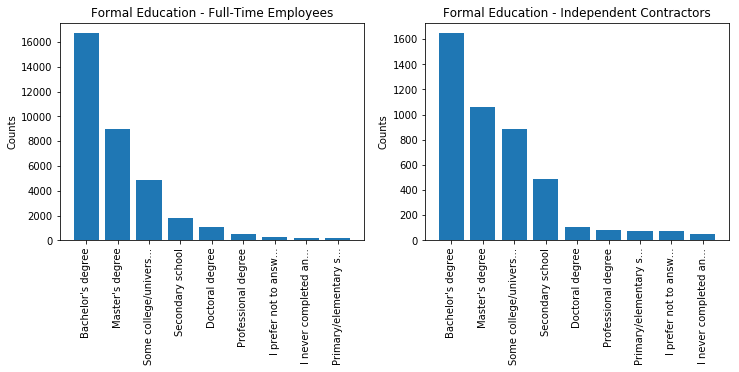

In [117]:
# Produce comparative bar charts for FormalEducation column
bar_chart_compare('FormalEducation', 'Formal Education')

For the sake of simplicity, the numerical analysis will focus on the percentage who achieved postgraduate degrees versus those that did not even finish college.  For a profession such as software development, achieving a bachelor's degree is a reasonable benchmark of expected level of education.

In [119]:
# Create value count data for FormalEducation column from both dataframes
ft_formal_education = df_ft.FormalEducation.value_counts()
ind_formal_education = df_ind.FormalEducation.value_counts()

# Find proportion of full-time employees with post-graduate degrees
ft_post_grad = (ft_formal_education["Master's degree"] + ft_formal_education["Doctoral degree"])/len(df_ft)

# Find proportion of independent contractors with post-graduate degrees
ind_post_grad = (ind_formal_education["Master's degree"] + ind_formal_education["Doctoral degree"])/len(df_ind)

# Find proportion of full-time employees that never finished college
ft_never_grad = (ft_formal_education ["Some college/university study without earning a bachelor's degree"] +
                ft_formal_education["Secondary school"] +
                ft_formal_education["I never completed any formal education"] +
                ft_formal_education["Primary/elementary school"]) / len(df_ft)

# Find proportion of independent contractors that never finished college
ind_never_grad = (ind_formal_education ["Some college/university study without earning a bachelor's degree"] +
                ind_formal_education["Secondary school"] +
                ind_formal_education["I never completed any formal education"] +
                ind_formal_education["Primary/elementary school"]) / len(df_ind)

# Print the findings
print("Proportion of full-time employees with postgraduate education: ", ft_post_grad)
print("Proportion of independent contractors with postgraduate education: ", ind_post_grad)
print("")
print("Proportion of full-time employees that never finished college: ", ft_never_grad)
print("Proportion of independent contractors that never finished college: ", ind_never_grad)

Proportion of full-time employees with postgraduate education:  0.2910322468592601
Proportion of independent contractors with postgraduate education:  0.26023718952785857

Proportion of full-time employees that never finished college:  0.2027731141087246
Proportion of independent contractors that never finished college:  0.3369881405236071


From the visual and numerical analyses, it is apparent that full-time employees tend to have slightly more postgraduate education, but are far more likely to have finished college.
### Question 2: Difference in Career Satisfaction
Are full-time employees more satisfied with their careers than independent contractors?  Once again, comparative plots and a numerical analysis will be completed to answer the question.

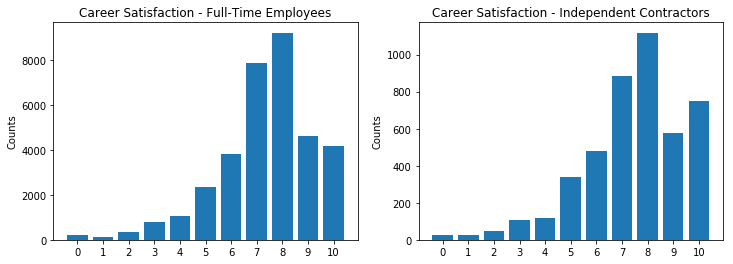

In [120]:
# Create list of labels for CareerSatisfaction bar chart x axis
cs_labels = list(np.arange(11))

# Create comparative bar charts for CareerSatisfaction column
bar_chart_compare('CareerSatisfaction', 'Career Satisfaction', cs_labels)

A straight evaluation of mean score is sufficient for the numerical analysis.

In [121]:
# Find mean career satisfaction score for full-time employees
ft_cs_mean = df_ft.CareerSatisfaction.mean()

# Find mean career satisfaction score for independent contractors
ind_cs_mean = df_ind.CareerSatisfaction.mean()

# Print the findings
print("The average career satisfaction score for full-time employees is ", ft_cs_mean)
print("The average career satisfaction score for independent contractors is ", ind_cs_mean)

The average career satisfaction score for full-time employees is  7.3545996642158284
The average career satisfaction score for independent contractors is  7.453792794808682


The visual and numerical analyses indicate that full-time employees tend to have slightly lower career satisfaction when compared to independent contractors.  This was apparent in the plots, but the numerical analysis was required for confirmation.
### Question 3
Do full-time employees value job security more than independent contractors?  Another bar chart and basic numerical analysis will indicate the answer.  Since this question requests an ordinal response, the bar chart categories should be ordered consistently.  In answering this question, the "No response" entries created during the cleaning phase are not useful.  Therefore, each of the dataframes removes these entries so that the bar chart comparison function will not display them.  If needed, the dataframes can be restored using the copies created at the end of the data cleaning from the previous section.

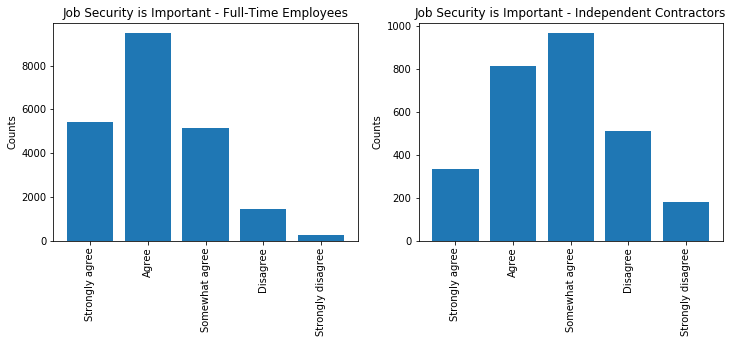

In [122]:
# Subset the dataframes to not contain any entries of "No response" in the JobSecurity column
df_ft = df_ft.query('JobSecurity != "No response"')
df_ind = df_ind.query('JobSecurity != "No response"')

# Create list of labels for JobSecurity bar chart x axis
js_labels = ['Strongly agree', 'Agree', 'Somewhat agree', 'Disagree', 'Strongly disagree']

# Create comparative bar charts for Job Security column
bar_chart_compare('JobSecurity', 'Job Security is Important', js_labels)

For the numerical analysis, the proportion of responses that agreed with the prompt "Job security is important" will be calculated for each subset of the data.

In [125]:
# Create value count data for JobSecurity column from both dataframes
ft_job_security = df_ft.JobSecurity.value_counts()
ind_job_security = df_ind.JobSecurity.value_counts()

# Make list of job security responses that can be characterized as agreeing with the prompt
agreed = ['Strongly agree', 'Agree', 'Somewhat agree']

# Find proportion of full-time employees that agree job security is important
ft_js_agreed = 0
ind_js_agreed = 0

for item in agreed:
    ft_js_agreed += ft_job_security[item]
    ind_js_agreed += ind_job_security[item]

ft_js_prop = ft_js_agreed / len(df_ft)
ind_js_prop = ind_js_agreed / len(df_ind)

# Print the findings
print("The proportion of full-time employees that think job security is important is ", ft_js_prop)
print("The proportion of independent contractors that think job security is important is ", ind_js_prop)

The proportion of full-time employees that think job security is important is  0.9215298232695139
The proportion of independent contractors that think job security is important is  0.752936988252047


And so, from both the plots and numerical analysis, it is very apparent that full-time employees value job security much more than independent contractors.
## Evaluation
The following conclusions were made from the analysis:
<ul>
    <li>Full-time employees tend to have slightly more postgraduate education than independent contractors</li>
    <li>Full-time employees are much more likely to have finished college</li>
    <li>Independent contractors have a slightly higher career satisfaction on average than full-time employees</li>
    <li>Full-time employees value job security more than independent contractors</li>
</ul>
So, for a software developer earlier in their career who values stability (job security), it would make sense to finish college and pursue a conventional full-time career at a company.  On the other hand, if an aspiring software developer does not see the benefit in finishing college, they still have a shot at having a satisfying software development career working as an independent contractor.